**Trabajo realizado por Alberto Garzón**

Realizado en Google Colab. Para su pleno funcionamiento y evitar descargas, se va a necesitar subir los siguientes datasets, en Google Colab:


*   'CSV Twitter20kV5.csv'
*   'clusters_asignados.csv'
*   'clusters_kmeans'
*   'Dataset_Completo_Integrado'
*   'Excel Instagram'
*   'Excel Tiktok 1k'
*   'CSV Instagram 10kVF'
*   'CSV TikTok 1kVF'

In [ ]:
#Limpieza, Transformación y Tratamiento de Datos para Twitter / X

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

try:
    df = pd.read_csv('twitter20kV5.csv', delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')
    print("Archivo cargado correctamente con codificación ISO-8859-1 y delimitador ';'.")
except UnicodeDecodeError:
    print("Error de codificación. Intentando con otra codificación...")
    df = pd.read_csv('twitter20kV4.csv', delimiter=';', encoding='latin1', on_bad_lines='skip')
    print("Archivo cargado correctamente con codificación latin1 y delimitador ';'.")

df.replace("", np.nan, inplace=True)


num_cols = df.select_dtypes(include=[np.number]).columns
text_cols = df.select_dtypes(include=[object]).columns


df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


for col in text_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())


FileNotFoundError: [Errno 2] No such file or directory: 'twitter20kV5.csv'

In [ ]:

print("Valores nulos antes de la imputación:")
print(df.isnull().sum())

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
for col in text_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("Valores nulos después de la imputación:")
print(df.isnull().sum())


Valores nulos antes de la imputación:
author/canDm               0
author/canMediaTag         0
author/coverPicture        0
author/createdAt           0
author/description         0
                       ...  
Unnamed: 90            20000
Unnamed: 91            20000
Unnamed: 92            20000
Unnamed: 93            20000
Unnamed: 94            20000
Length: 95, dtype: int64
Valores nulos después de la imputación:
author/canDm               0
author/canMediaTag         0
author/coverPicture        0
author/createdAt           0
author/description         0
                       ...  
Unnamed: 90            20000
Unnamed: 91            20000
Unnamed: 92            20000
Unnamed: 93            20000
Unnamed: 94            20000
Length: 95, dtype: int64


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('twitter20kV5.csv', delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')
    print("Archivo cargado correctamente con codificación ISO-8859-1 y delimitador ';'.")
except UnicodeDecodeError:
    print("Error de codificación. Intentando con otra codificación...")
    df = pd.read_csv('twitter20kV4.csv', delimiter=';', encoding='latin1', on_bad_lines='skip')
    print("Archivo cargado correctamente con codificación latin1 y delimitador ';'.")

df = df.apply(pd.to_numeric, errors='coerce')

print("\nTipos de datos de las columnas después de la conversión:")
print(df.dtypes)

numeric_columns = df.select_dtypes(include=['number']).columns
print(f"\nColumnas numéricas: {numeric_columns}")
print(f"Número de columnas numéricas: {len(numeric_columns)}")


<ipython-input-4-3760ce0c48e9>:5: DtypeWarning: Columns (30,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('twitter20kV5.csv', delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')


Archivo cargado correctamente con codificación ISO-8859-1 y delimitador ';'.

Tipos de datos de las columnas después de la conversión:
author/canDm           float64
author/canMediaTag     float64
author/coverPicture    float64
author/createdAt       float64
author/description     float64
                        ...   
Unnamed: 90            float64
Unnamed: 91            float64
Unnamed: 92            float64
Unnamed: 93            float64
Unnamed: 94            float64
Length: 95, dtype: object

Columnas numéricas: Index(['author/canDm', 'author/canMediaTag', 'author/coverPicture',
       'author/createdAt', 'author/description',
       'author/entities/url/urls/0/display_url',
       'author/entities/url/urls/0/url', 'author/favouritesCount',
       'author/followers', 'author/following', 'author/hasCustomTimelines',
       'author/isBlueVerified', 'author/location', 'author/mediaCount',
       'author/name', 'author/pinnedTweetIds/0', 'author/profilePicture',
       'author/statuse

Número de outliers en 'likeCount': 2429


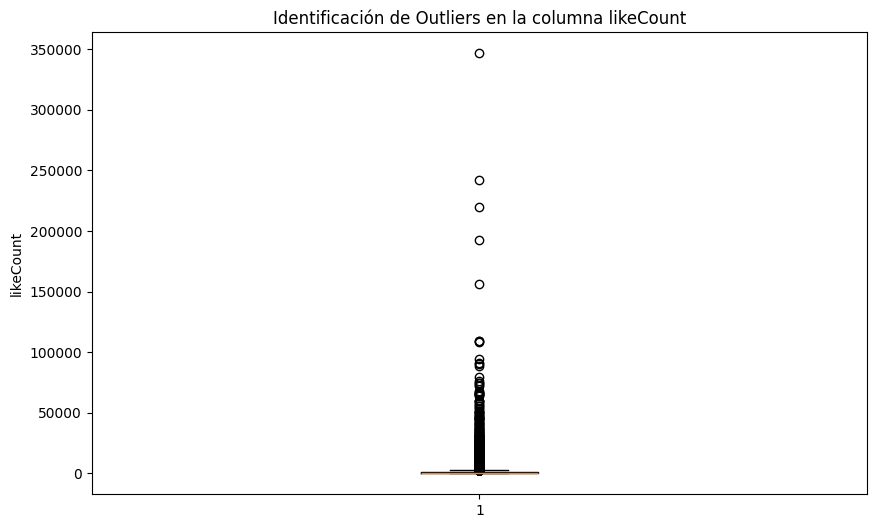

Outliers encontrados en 'likeCount':
15       18451
29        6114
38        3002
45        2696
50        5017
         ...  
19965     2344
19967     5727
19969     2504
19990     7901
19991    11684
Name: likeCount, Length: 2429, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = df['likeCount']

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Número de outliers en 'likeCount': {len(outliers)}")

plt.figure(figsize=(10,6))
plt.boxplot(data)
plt.title('Identificación de Outliers en la columna likeCount')
plt.ylabel('likeCount')
plt.show()

print("Outliers encontrados en 'likeCount':")
print(outliers)


<ipython-input-8-5fdda22d3267>:9: DtypeWarning: Columns (30,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')


Archivo 'twitter20kV5.csv' cargado correctamente con codificación ISO-8859-1.


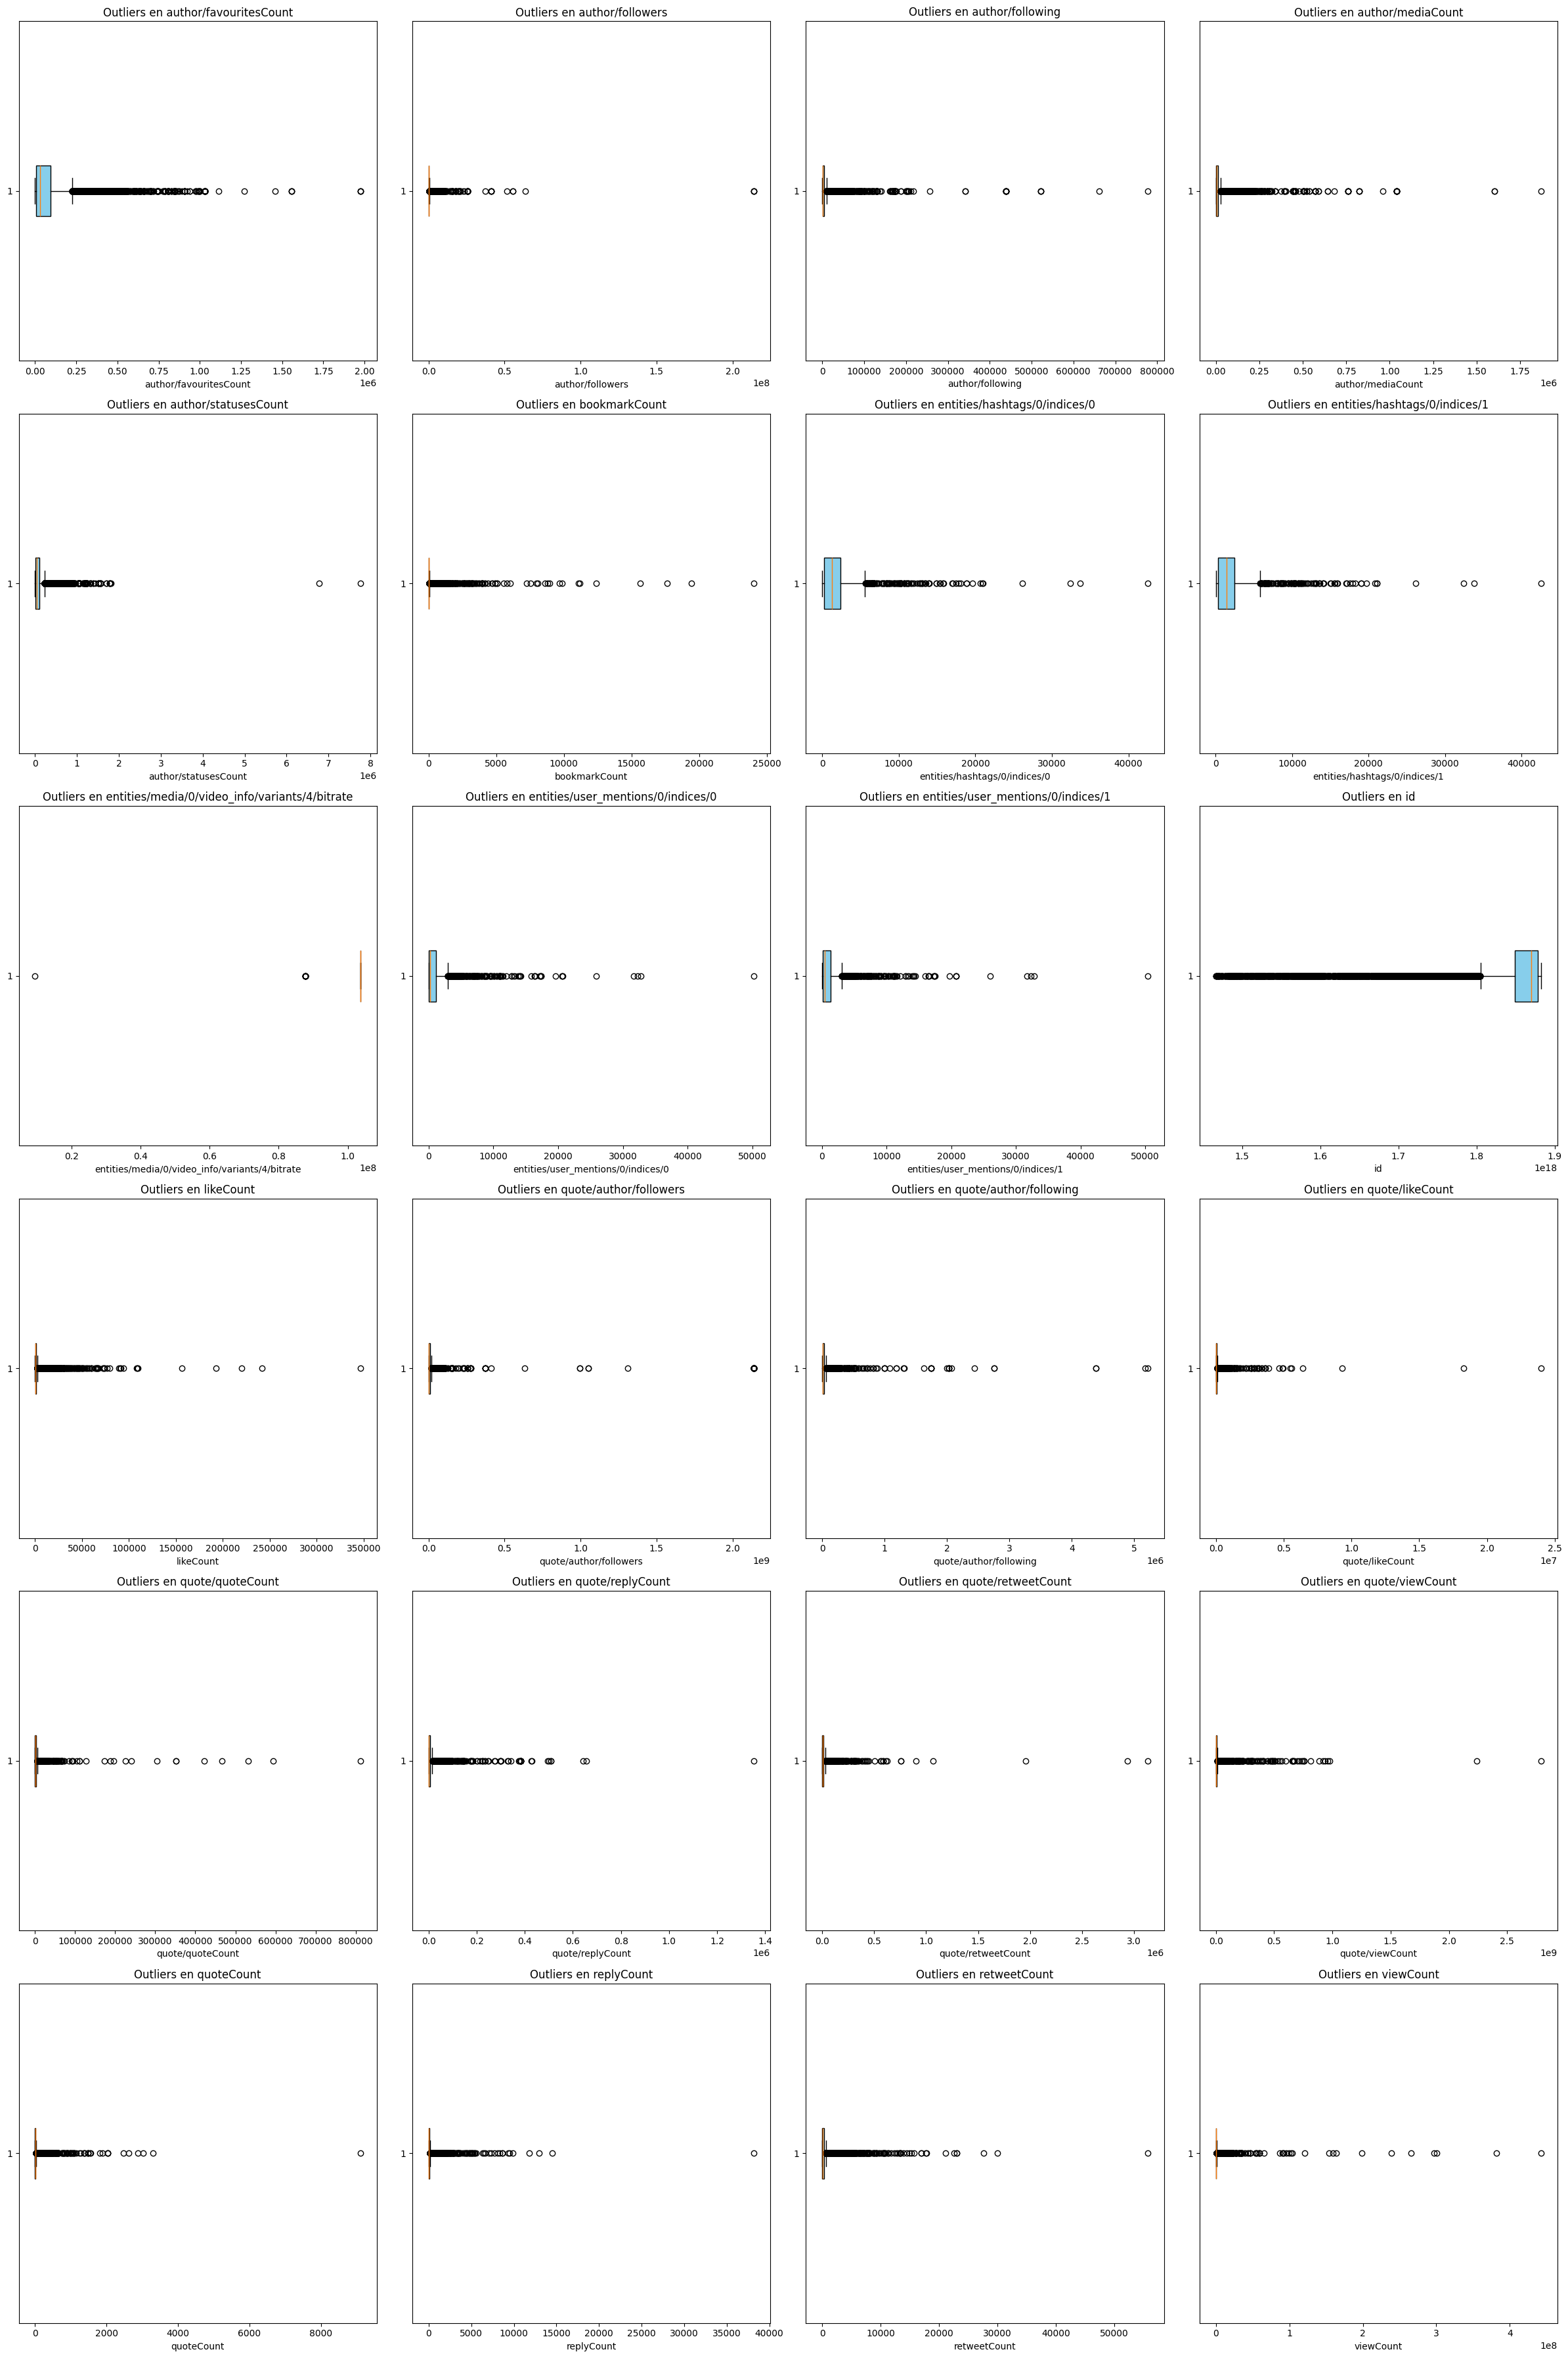

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def cargar_csv(archivo):
    """
    Carga el archivo CSV con codificación específica y maneja errores.
    """
    try:
        df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')
        print(f"Archivo '{archivo}' cargado correctamente con codificación ISO-8859-1.")
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        df = None
    return df

def detectar_outliers(df):
    """
    Detecta outliers en columnas numéricas y devuelve una lista con las columnas afectadas.
    """
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    columns_with_outliers = []

    for column in numerical_columns:
        data = df[column].dropna()


        Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
        IQR = Q3 - Q1


        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]


        if len(outliers) > 0:
            columns_with_outliers.append((column, outliers))
    return columns_with_outliers

def graficar_outliers(df, columns_with_outliers):
    """
    Genera boxplots para columnas con outliers.
    """
    if len(columns_with_outliers) > 0:
        num_plots = len(columns_with_outliers)
        rows = (num_plots // 4) + (num_plots % 4 > 0)
        cols = 4

        plt.figure(figsize=(cols * 6, rows * 6))

        for i, (column, _) in enumerate(columns_with_outliers):
            data = df[column].dropna()

            plt.subplot(rows, cols, i + 1)
            plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
            plt.title(f'Outliers en {column}', fontsize=12)
            plt.xlabel(column)

        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron outliers en ninguna de las columnas numéricas.")

archivo = 'twitter20kV5.csv'
df = cargar_csv(archivo)


if df is not None:

    columns_with_outliers = detectar_outliers(df)
    graficar_outliers(df, columns_with_outliers)



**Nube de palabras**

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

def filtrar_palabras_largas(texto, longitud_minima=4):
    """
    Filtra palabras que tengan menos de una longitud mínima dada.
    """
    palabras = texto.split()
    palabras_largas = [palabra for palabra in palabras if len(palabra) >= longitud_minima]
    return " ".join(palabras_largas)

def eliminar_urls_y_twitter_handles(texto):
    """
    Elimina URLs (https://...) y los handles de Twitter (@usuario) del texto.
    """
    texto_limpio = re.sub(r'http\S+|www\S+', '', texto)
    texto_limpio = re.sub(r'@\w+', '', texto_limpio)
    return texto_limpio

def generar_nube_palabras(texto, titulo="Nube de Palabras"):
    """
    Genera y muestra una nube de palabras a partir de un texto dado.
    """
    stopwords = set(STOPWORDS)

    palabras_excluir = {"para", "como", "que", "la", "de", "en", "el", "los", "las", "y", "a", "con", "por", "un", "una", "su", "del", "al"}
    stopwords = stopwords.union(palabras_excluir)

    nube_palabras = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        contour_color='white',
        contour_width=3,
        width=800,
        height=400,
        colormap='Spectral',
        random_state=42,
        font_path=None,
    ).generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=20, color='white', fontweight='bold')
    plt.show()

archivo = 'twitter20kV5.csv'
df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')

if 'fullText' in df.columns:
    texto_completo = " ".join(str(texto) for texto in df['fullText'].dropna())

    texto_sin_urls_y_handles = eliminar_urls_y_twitter_handles(texto_completo)

    texto_filtrado = filtrar_palabras_largas(texto_sin_urls_y_handles)

    generar_nube_palabras(texto_filtrado, titulo="Nube de Palabras - fullText (Palabras > 4 letras)")
else:
    print("La columna 'fullText' no se encuentra en el archivo.")


**Gráficos descriptivos: Diagramas de dispersión, cajas que permitan la visualización de las variables, tendencias y relación de las variables entre ellas.**

**MEDIDAS DE TENDENCIA, DISPERSIÓN Y FRECUENCIAS**

In [ ]:

import pandas as pd

archivo = 'twitter20kV5.csv'
df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')


columnas = ["viewCount", "likeCount", "retweetCount", "replyCount", "quoteCount"]

def calcular_estadisticas(df, columnas):
    resultados = {}
    for columna in columnas:
        if columna in df.columns:

            media = df[columna].mean()
            mediana = df[columna].median()
            moda = df[columna].mode()[0]

            desviacion_estandar = df[columna].std()
            rango = df[columna].max() - df[columna].min()

            resultados[columna] = {
                "Media": media,
                "Mediana": mediana,
                "Moda": moda,
                "Desviación Estándar": desviacion_estandar,
                "Rango": rango
            }
    return resultados

estadisticas = calcular_estadisticas(df, columnas)

for columna, valores in estadisticas.items():
    print(f"Estadísticas para '{columna}':")
    print(f"  Media: {valores['Media']}")
    print(f"  Mediana: {valores['Mediana']}")
    print(f"  Moda: {valores['Moda']}")
    print(f"  Desviación Estándar: {valores['Desviación Estándar']}")
    print(f"  Rango: {valores['Rango']}")
    print("-" * 50)


Estadísticas para 'viewCount':
  Media: 846528.3488661075
  Mediana: 153285.0
  Moda: 16910.0
  Desviación Estándar: 7055064.586761993
  Rango: 442856500.0
--------------------------------------------------
Estadísticas para 'likeCount':
  Media: 1408.40175
  Mediana: 352.0
  Moda: 91
  Desviación Estándar: 5712.864508693663
  Rango: 346651
--------------------------------------------------
Estadísticas para 'retweetCount':
  Media: 357.9679
  Mediana: 79.5
  Moda: 11
  Desviación Estándar: 1059.4598708448038
  Rango: 55688
--------------------------------------------------
Estadísticas para 'replyCount':
  Media: 101.39155
  Mediana: 27.0
  Moda: 9
  Desviación Estándar: 463.1901792954016
  Rango: 38209
--------------------------------------------------
Estadísticas para 'quoteCount':
  Media: 19.9111
  Mediana: 4.0
  Moda: 0
  Desviación Estándar: 105.95396834928307
  Rango: 9105
--------------------------------------------------


<ipython-input-23-caab9488c6f2>:6: DtypeWarning: Columns (30,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')


In [ ]:

import pandas as pd

archivo = 'twitter20kV5.csv'
df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')

columnas = ["viewCount", "likeCount", "retweetCount", "replyCount", "quoteCount"]

def calcular_frecuencias(df, columnas):
    resultados = {}
    for columna in columnas:
        if columna in df.columns:
            frecuencia_absoluta = df[columna].value_counts().head(3)

            frecuencia_relativa = df[columna].value_counts(normalize=True).head(3) * 100

            resultados[columna] = {
                "Frecuencia Absoluta": frecuencia_absoluta,
                "Frecuencia Relativa": frecuencia_relativa
            }
    return resultados

frecuencias = calcular_frecuencias(df, columnas)

for columna, valores in frecuencias.items():
    print(f"Frecuencias para '{columna}':")
    print("Frecuencia Absoluta (Top 3):")
    print(valores['Frecuencia Absoluta'])
    print("Frecuencia Relativa (Top 3):")
    print(valores['Frecuencia Relativa'])
    print("-" * 50)


Frecuencias para 'viewCount':
Frecuencia Absoluta (Top 3):
viewCount
16910.0    6
46670.0    6
59650.0    5
Name: count, dtype: int64
Frecuencia Relativa (Top 3):
viewCount
16910.0    0.031066
46670.0    0.031066
59650.0    0.025888
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencias para 'likeCount':
Frecuencia Absoluta (Top 3):
likeCount
91    61
55    57
81    55
Name: count, dtype: int64
Frecuencia Relativa (Top 3):
likeCount
91    0.305
55    0.285
81    0.275
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencias para 'retweetCount':
Frecuencia Absoluta (Top 3):
retweetCount
11    297
13    281
8     275
Name: count, dtype: int64
Frecuencia Relativa (Top 3):
retweetCount
11    1.485
13    1.405
8     1.375
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencias para 'replyCount':
Frecuencia Absoluta (Top 3):
replyCount
9     608
8     603
11    586
Name: co

<ipython-input-25-5373ad416c1a>:6: DtypeWarning: Columns (30,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')


In [ ]:
#Limpieza, Transformación y Tratamiento de Datos para INSTAGRAM

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


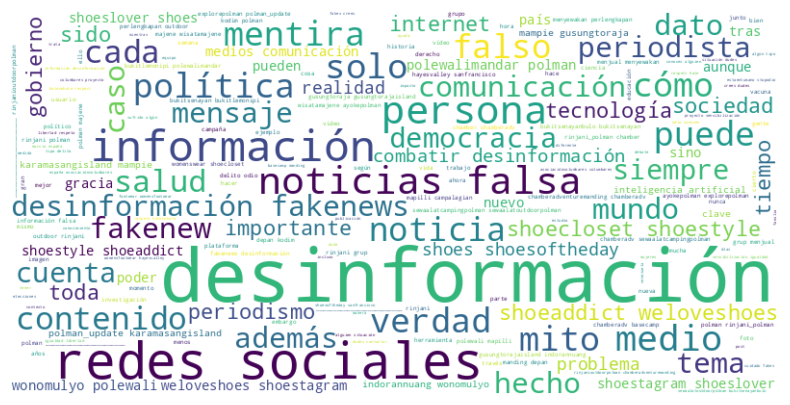

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

custom_stopwords = {"bulo", "bulos", "fake", "news", "desinformacion", "misinformation"}

archivo = 'CSV 10K Instagram.csv'
df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')

if "caption" in df.columns:
    text = " ".join(str(caption) for caption in df["caption"].dropna())

    text_cleaned = re.sub(r"[^\w\s]", "", text.lower())

    words = text_cleaned.split()
    filtered_words = [word for word in words if len(word) >= 4 and word not in stop_words and word not in custom_stopwords]

    final_text = " ".join(filtered_words)

    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(final_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("La columna 'caption' no se encontró en el dataset.")


In [ ]:


import pandas as pd

archivo = 'CSV 10K Instagram.csv'
df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')

df = df.dropna(how="all")

for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna("Sin información", inplace=True)
    elif df[col].dtype in ["int64", "float64"]:
        df[col].fillna(df[col].median(), inplace=True)


print("Valores nulos después del tratamiento:\n", df.isnull().sum())

df.head()


🔹 Correlación entre likes y comentarios: 0.6293


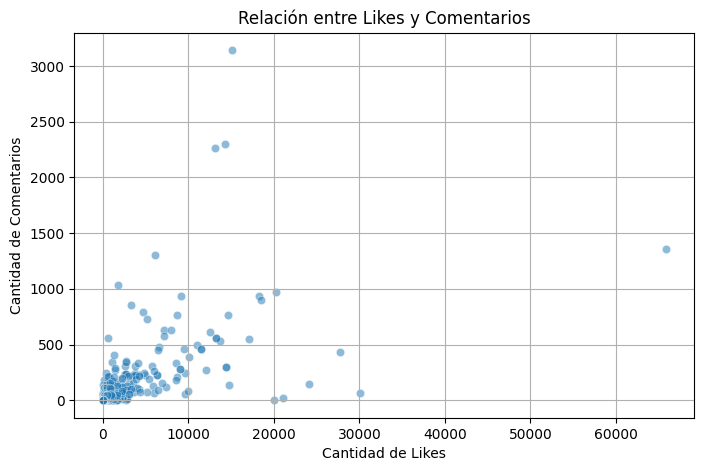

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



archivo = 'CSV 10K Instagram.csv'
df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')

if "likeCount" in df.columns and "commentCount" in df.columns:

    df = df.dropna(subset=["likeCount", "commentCount"])


    df["likeCount"] = pd.to_numeric(df["likeCount"], errors="coerce")
    df["commentCount"] = pd.to_numeric(df["commentCount"], errors="coerce")

    df = df.dropna(subset=["likeCount", "commentCount"])

    correlation = df["likeCount"].corr(df["commentCount"])
    print(f"🔹 Correlación entre likes y comentarios: {correlation:.4f}")

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df["likeCount"], y=df["commentCount"], alpha=0.5)
    plt.xlabel("Cantidad de Likes")
    plt.ylabel("Cantidad de Comentarios")
    plt.title("Relación entre Likes y Comentarios")
    plt.grid(True)
    plt.show()
else:
    print("Las columnas 'likeCount' y/o 'commentCount' no se encontraron en el dataset.")


🔹 Correlación entre Likes y Comentarios: 0.6292
🔹 Correlación entre Likes y Longitud del Caption: 0.0387
🔹 Correlación entre Comentarios y Longitud del Caption: 0.0549
🔹 Correlación entre Likes y Cantidad de Hashtags: -0.0253


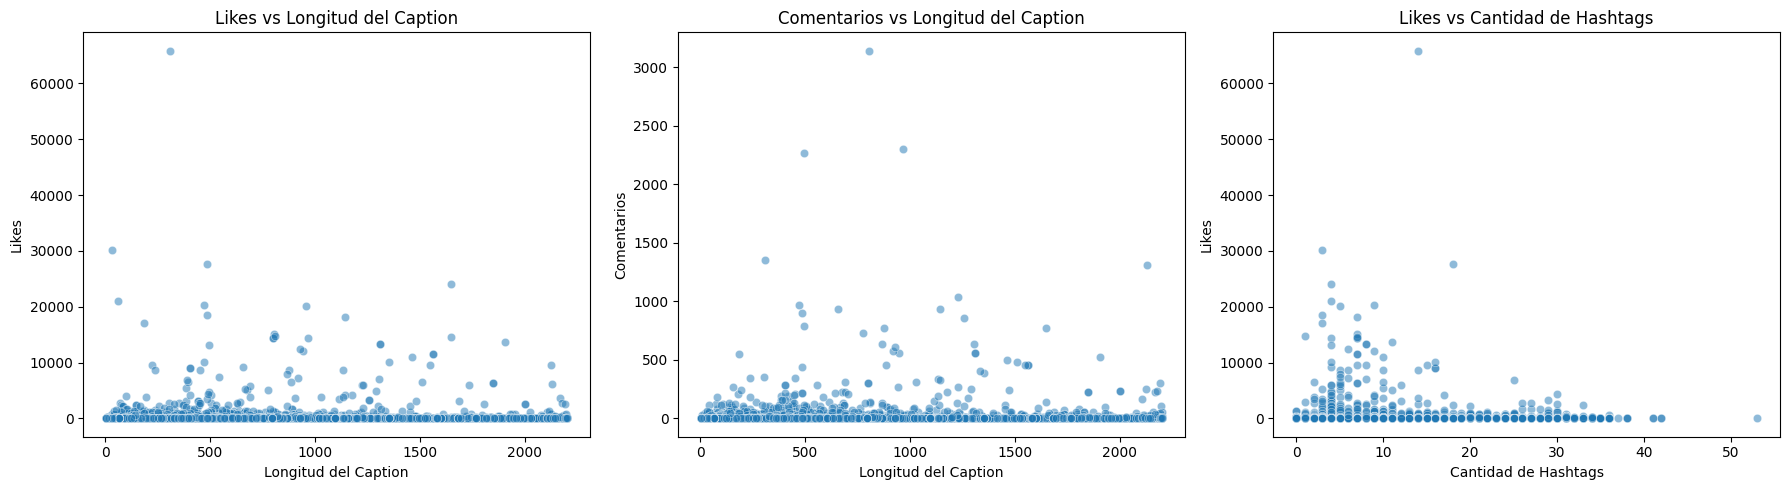

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


archivo = 'CSV 10K Instagram.csv'
df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')

required_columns = {"likeCount", "commentCount", "caption"}
if required_columns.issubset(df.columns):
    df = df.dropna(subset=["likeCount", "commentCount", "caption"])

    df["likeCount"] = pd.to_numeric(df["likeCount"], errors="coerce")
    df["commentCount"] = pd.to_numeric(df["commentCount"], errors="coerce")

    df["caption_length"] = df["caption"].apply(lambda x: len(str(x)))  # Longitud del caption
    df["hashtag_count"] = df["caption"].apply(lambda x: str(x).count("#"))  # Número de hashtags

    corr_likes_comments = df["likeCount"].corr(df["commentCount"])
    corr_likes_caption = df["likeCount"].corr(df["caption_length"])
    corr_comments_caption = df["commentCount"].corr(df["caption_length"])
    corr_likes_hashtags = df["likeCount"].corr(df["hashtag_count"])

    print(f"🔹 Correlación entre Likes y Comentarios: {corr_likes_comments:.4f}")
    print(f"🔹 Correlación entre Likes y Longitud del Caption: {corr_likes_caption:.4f}")
    print(f"🔹 Correlación entre Comentarios y Longitud del Caption: {corr_comments_caption:.4f}")
    print(f"🔹 Correlación entre Likes y Cantidad de Hashtags: {corr_likes_hashtags:.4f}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(x=df["caption_length"], y=df["likeCount"], alpha=0.5, ax=axes[0])
    axes[0].set_title("Likes vs Longitud del Caption")
    axes[0].set_xlabel("Longitud del Caption")
    axes[0].set_ylabel("Likes")

    sns.scatterplot(x=df["caption_length"], y=df["commentCount"], alpha=0.5, ax=axes[1])
    axes[1].set_title("Comentarios vs Longitud del Caption")
    axes[1].set_xlabel("Longitud del Caption")
    axes[1].set_ylabel("Comentarios")

    sns.scatterplot(x=df["hashtag_count"], y=df["likeCount"], alpha=0.5, ax=axes[2])
    axes[2].set_title("Likes vs Cantidad de Hashtags")
    axes[2].set_xlabel("Cantidad de Hashtags")
    axes[2].set_ylabel("Likes")

    plt.tight_layout()
    plt.show()

else:
    print("No se encontraron todas las columnas necesarias en el dataset.")

In [ ]:
#Limpieza, Transformación y Tratamiento de Datos para TIKTOK

In [ ]:

import pandas as pd

archivo = 'CSV 468 TikTok.csv'
df = pd.read_csv(archivo, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')

archivo2 = 'CSV 583 TikTok.csv'
df = pd.read_csv(archivo2, delimiter=';', encoding='ISO-8859-1', on_bad_lines='skip')


df1 = pd.read_csv(archivo)
df2 = pd.read_csv(archivo2)

cols1 = set(df1.columns)
cols2 = set(df2.columns)

if cols1 != cols2:
    print("Los datasets tienen columnas diferentes. Ajustando diferencias...")

    missing_cols1 = cols2 - cols1
    missing_cols2 = cols1 - cols2

    for col in missing_cols1:
        df1[col] = None
    for col in missing_cols2:
        df2[col] = None

    df1 = df1[sorted(df1.columns)]
    df2 = df2[sorted(df2.columns)]
    print("Las diferencias han sido corregidas.")

df_combined = pd.concat([df1, df2], ignore_index=True)

output_file = "/content/TikTok_Combined.csv"
df_combined.to_csv(output_file, index=False)

print(f"✅ Dataset combinado guardado en: {output_file}")



Los datasets tienen columnas diferentes. Ajustando diferencias...
Las diferencias han sido corregidas.


<ipython-input-7-0abcb60e1ec5>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[col] = None
<ipython-input-7-0abcb60e1ec5>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[col] = None
<ipython-input-7-0abcb60e1ec5>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[col] = None
<ipython-i

✅ Dataset combinado guardado en: /content/TikTok_Combined.csv


ESTUDIO DESCRIPTIVO Y ESTADISTICO

<ipython-input-3-189ecdc8e85b>:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_x_csv = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')
<ipython-input-3-189ecdc8e85b>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_x_csv['createdAt'] = pd.to_datetime(data_x_csv['createdAt'], errors='coerce')
<ipython-input-3-189ecdc8e85b>:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data_x_csv['month'] = data_x_csv['createdAt'].dt.to_period('M')


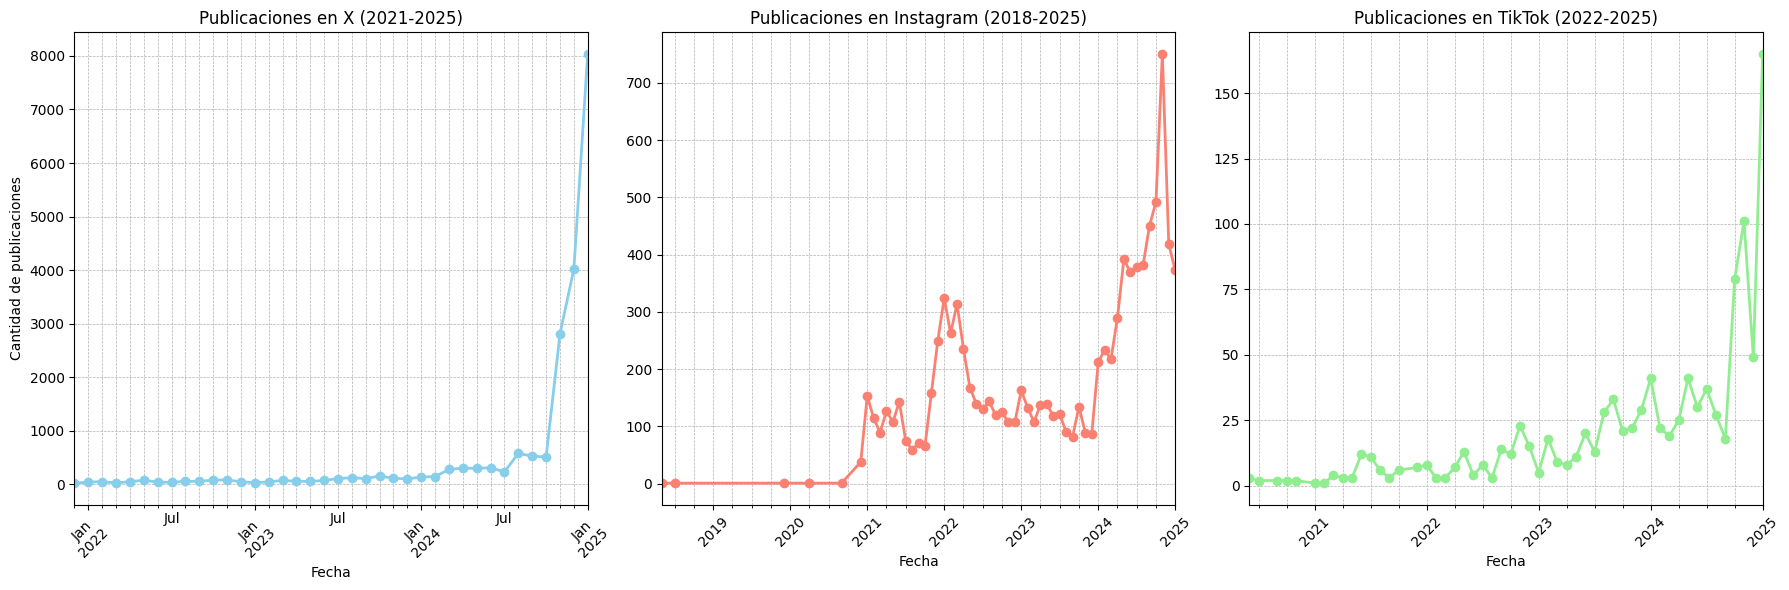

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

data_x_csv = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')

data_x_csv.head()
data_instagram = pd.ExcelFile('Excel Instagram.xlsx').parse(0)
data_tiktok = pd.ExcelFile('Excel Tiktok 1k.xlsx').parse(0)

data_x_csv['createdAt'] = pd.to_datetime(data_x_csv['createdAt'], errors='coerce')
data_x_csv = data_x_csv.dropna(subset=['createdAt'])
data_x_csv['month'] = data_x_csv['createdAt'].dt.to_period('M')
posts_by_month = data_x_csv.groupby('month').size()

data_instagram['createdAt'] = pd.to_datetime(data_instagram['createdAt'], errors='coerce')
data_instagram = data_instagram.dropna(subset=['createdAt'])
data_instagram['month'] = data_instagram['createdAt'].dt.to_period('M')
posts_by_month_instagram = data_instagram.groupby('month').size()

data_tiktok['createTimeISO'] = pd.to_datetime(data_tiktok['createTimeISO'], errors='coerce')
data_tiktok = data_tiktok.dropna(subset=['createTimeISO'])
data_tiktok['month'] = data_tiktok['createTimeISO'].dt.to_period('M')
posts_by_month_tiktok = data_tiktok.groupby('month').size()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

posts_by_month.plot(ax=axes[0], kind='line', color='skyblue', marker='o', linestyle='-', linewidth=2)
axes[0].set_title('Publicaciones en X (2021-2025)')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Cantidad de publicaciones')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

posts_by_month_instagram.plot(ax=axes[1], kind='line', color='salmon', marker='o', linestyle='-', linewidth=2)
axes[1].set_title('Publicaciones en Instagram (2018-2025)')
axes[1].set_xlabel('Fecha')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

posts_by_month_tiktok.plot(ax=axes[2], kind='line', color='lightgreen', marker='o', linestyle='-', linewidth=2)
axes[2].set_title('Publicaciones en TikTok (2022-2025)')
axes[2].set_xlabel('Fecha')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


<ipython-input-2-3e0a2c5cddb1>:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_x_csv = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')
<ipython-input-2-3e0a2c5cddb1>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_x_csv['createdAt'] = pd.to_datetime(data_x_csv['createdAt'], errors='coerce')


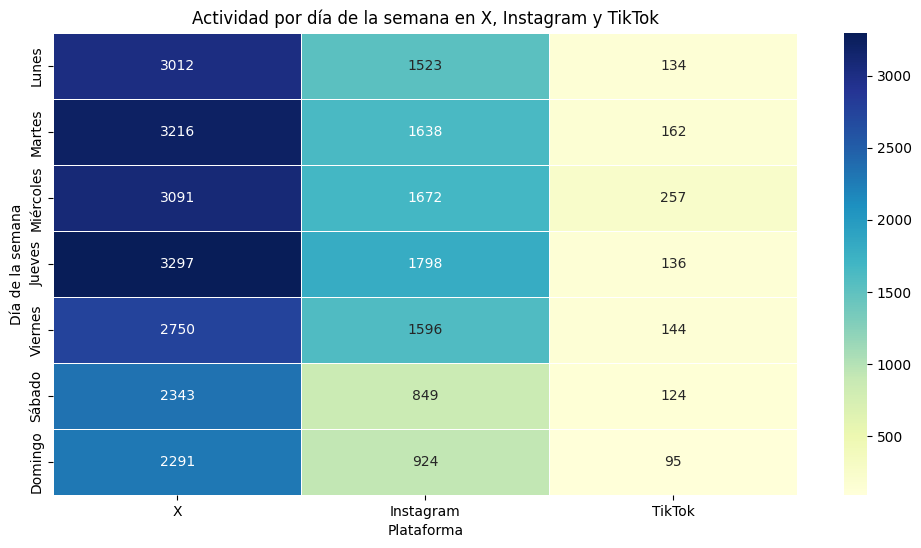

In [ ]:
#GRAFICO DIAS DE LA SEMANA CON MÁS POSTS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_x_csv = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')

data_x_csv.head()
data_instagram = pd.ExcelFile('Excel Instagram.xlsx').parse(0)
data_tiktok = pd.ExcelFile('Excel Tiktok 1k.xlsx').parse(0)

data_x_csv['createdAt'] = pd.to_datetime(data_x_csv['createdAt'], errors='coerce')
data_x_csv = data_x_csv.dropna(subset=['createdAt'])
data_x_csv['day_of_week'] = data_x_csv['createdAt'].dt.day_name()

data_instagram['createdAt'] = pd.to_datetime(data_instagram['createdAt'], errors='coerce')
data_instagram = data_instagram.dropna(subset=['createdAt'])
data_instagram['day_of_week'] = data_instagram['createdAt'].dt.day_name()

data_tiktok['createTimeISO'] = pd.to_datetime(data_tiktok['createTimeISO'], errors='coerce')
data_tiktok = data_tiktok.dropna(subset=['createTimeISO'])
data_tiktok['day_of_week'] = data_tiktok['createTimeISO'].dt.day_name()

activity_x = data_x_csv['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
activity_instagram = data_instagram['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
activity_tiktok = data_tiktok['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

heatmap_data = pd.DataFrame({
    'X': activity_x.fillna(0),
    'Instagram': activity_instagram.fillna(0),
    'TikTok': activity_tiktok.fillna(0)
})

dias_semana = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

heatmap_data.index = heatmap_data.index.map(dias_semana)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)

plt.title('Actividad por día de la semana en X, Instagram y TikTok')
plt.xlabel('Plataforma')
plt.ylabel('Día de la semana')
plt.show()


<ipython-input-2-6b309f6d867e>:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_x_csv = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')


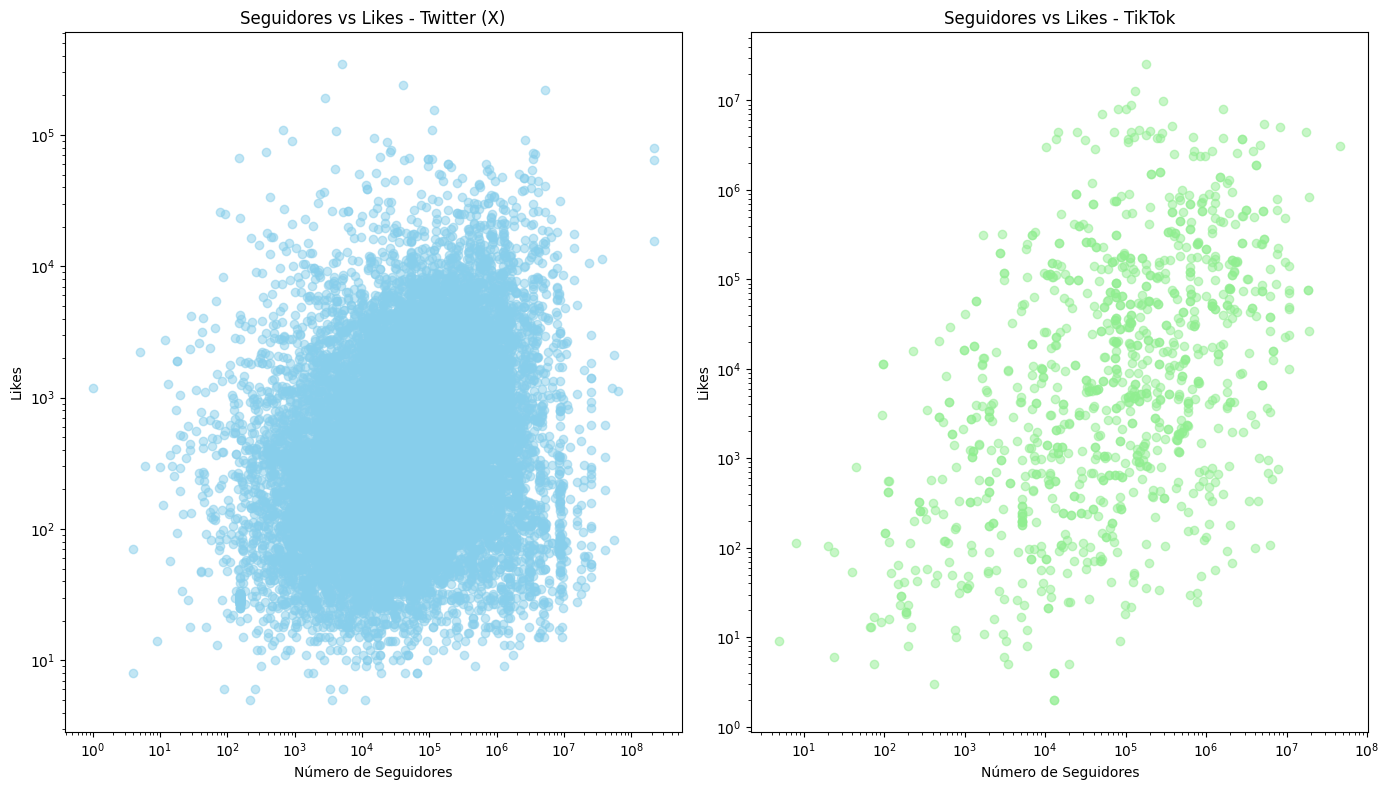

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_x_csv = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')
data_tiktok = pd.ExcelFile('Excel Tiktok 1k.xlsx').parse(0)

data_x_csv_clean = data_x_csv.dropna(subset=['author/followers', 'likeCount'])
data_tiktok_clean = data_tiktok.dropna(subset=['authorMeta/fans', 'diggCount'])

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.scatter(data_x_csv_clean['author/followers'], data_x_csv_clean['likeCount'], color='skyblue', alpha=0.5)
plt.title('Seguidores vs Likes - Twitter (X)')
plt.xlabel('Número de Seguidores')
plt.ylabel('Likes')
plt.xscale('log')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.scatter(data_tiktok_clean['authorMeta/fans'], data_tiktok_clean['diggCount'], color='lightgreen', alpha=0.5)
plt.title('Seguidores vs Likes - TikTok')
plt.xlabel('Número de Seguidores')
plt.ylabel('Likes')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()


<ipython-input-5-329c170b2524>:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_data_clean = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')


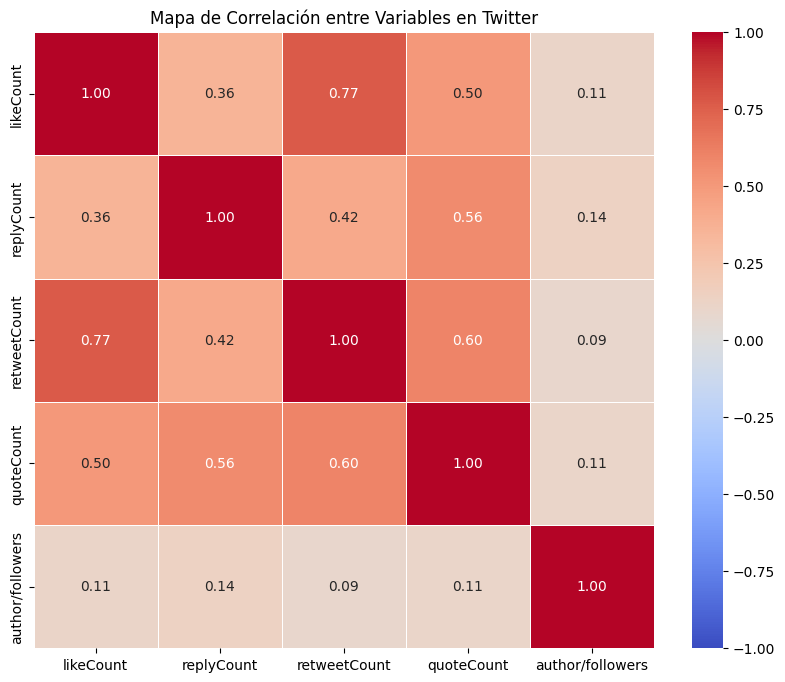

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

twitter_data_clean = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')

correlation_matrix = twitter_data_clean[['likeCount', 'replyCount', 'retweetCount', 'quoteCount', 'author/followers']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de Correlación entre Variables en Twitter')
plt.show()


<ipython-input-9-0c7c1bb20aa1>:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_data_clean = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')


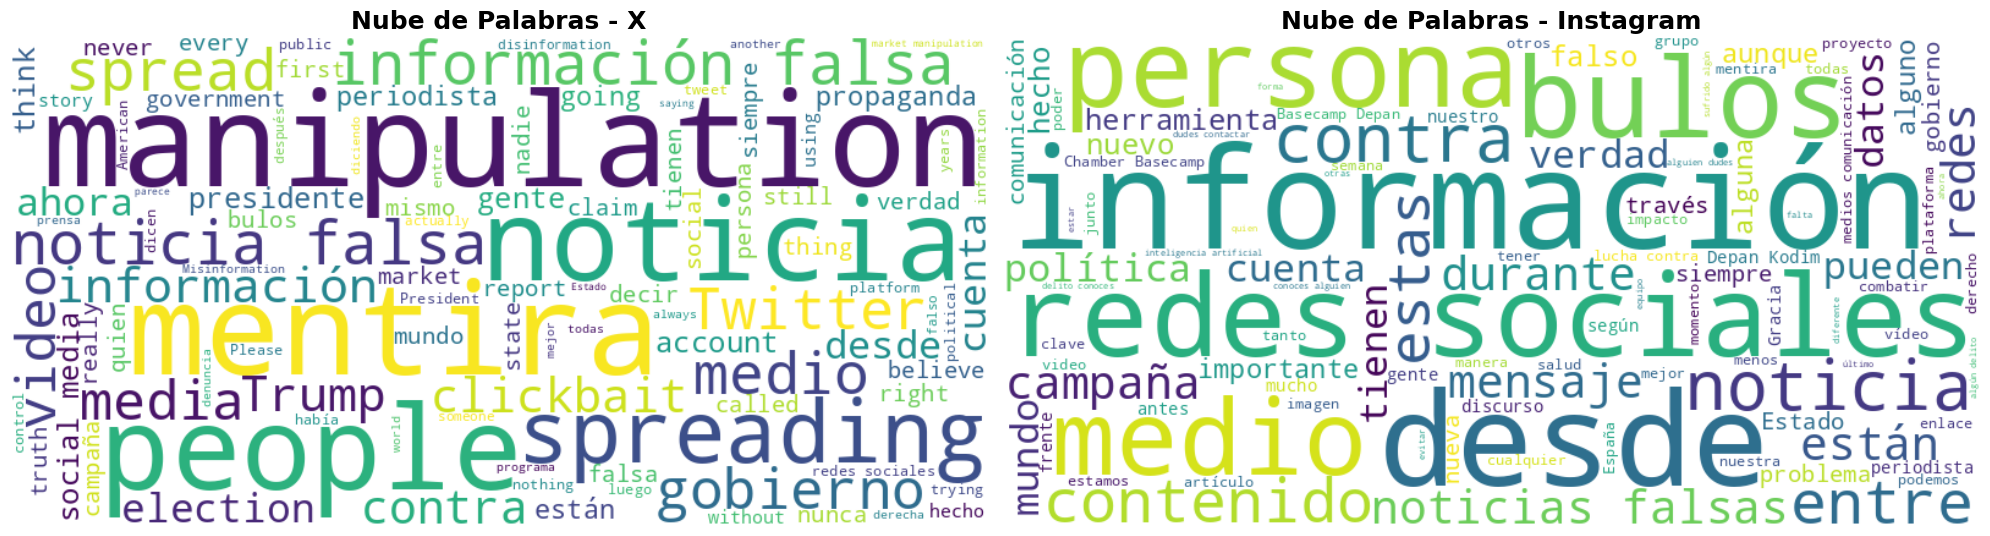

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

twitter_data_clean = pd.read_csv('CSV Twitter20kV5.csv', encoding='ISO-8859-1', delimiter=';')
instagram_data_clean = data_instagram = pd.ExcelFile('Excel Instagram.xlsx').parse(0)

twitter_texts = ' '.join(twitter_data_clean['fullText'].dropna())
instagram_texts = ' '.join(instagram_data_clean['caption'].dropna())

filtered_tokens_twitter = [word for word in twitter_texts.split() if len(word) > 4 and word.isalpha()]
filtered_text_twitter = ' '.join(filtered_tokens_twitter)

filtered_tokens_instagram = [word for word in instagram_texts.split() if len(word) > 4 and word.isalpha()]
filtered_text_instagram = ' '.join(filtered_tokens_instagram)

additional_stopwords_final_v3 = ['nuestro', 'nuestra', 'informacion', 'misinformatión', 'desinformación', 'puede', 'tiene', 'porque',
                                'mucho', 'hasta', 'tiempo', 'estos', 'RINJANI', 'Menjual', 'mucha', 'perlengkapan', 'sobre', 'misinformation',
                                'también', 'donde', 'todos', 'cuando', 'parte', 'hacer', 'Rinjani', 'Polman', 'menyewakan', 'Rinjani', 'a través']

filtered_tokens_twitter_final_v3 = [word for word in filtered_tokens_twitter if word not in additional_stopwords_final_v3]
filtered_text_twitter_final_v3 = ' '.join(filtered_tokens_twitter_final_v3)

filtered_tokens_instagram_final_v3 = [word for word in filtered_tokens_instagram if word not in additional_stopwords_final_v3]
filtered_text_instagram_final_v3 = ' '.join(filtered_tokens_instagram_final_v3)

wordcloud_filtered_twitter_final_v3 = WordCloud(width=800, height=400,
                                                 background_color='white',
                                                 max_words=100,
                                                 colormap='viridis',
                                                 contour_width=3,
                                                 contour_color='black',
                                                 prefer_horizontal=0.7,
                                                 relative_scaling=0.3).generate(filtered_text_twitter_final_v3)

wordcloud_filtered_instagram_final_v3 = WordCloud(width=800, height=400,
                                                   background_color='white',
                                                   max_words=100,
                                                   colormap='viridis',
                                                   contour_width=3,
                                                   contour_color='black',
                                                   prefer_horizontal=0.7,
                                                   relative_scaling=0.3).generate(filtered_text_instagram_final_v3)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].imshow(wordcloud_filtered_twitter_final_v3, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Nube de Palabras - X', fontsize=18, weight='bold', color='black')

axes[1].imshow(wordcloud_filtered_instagram_final_v3, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Nube de Palabras - Instagram', fontsize=18, weight='bold', color='black')

plt.tight_layout()
plt.show()


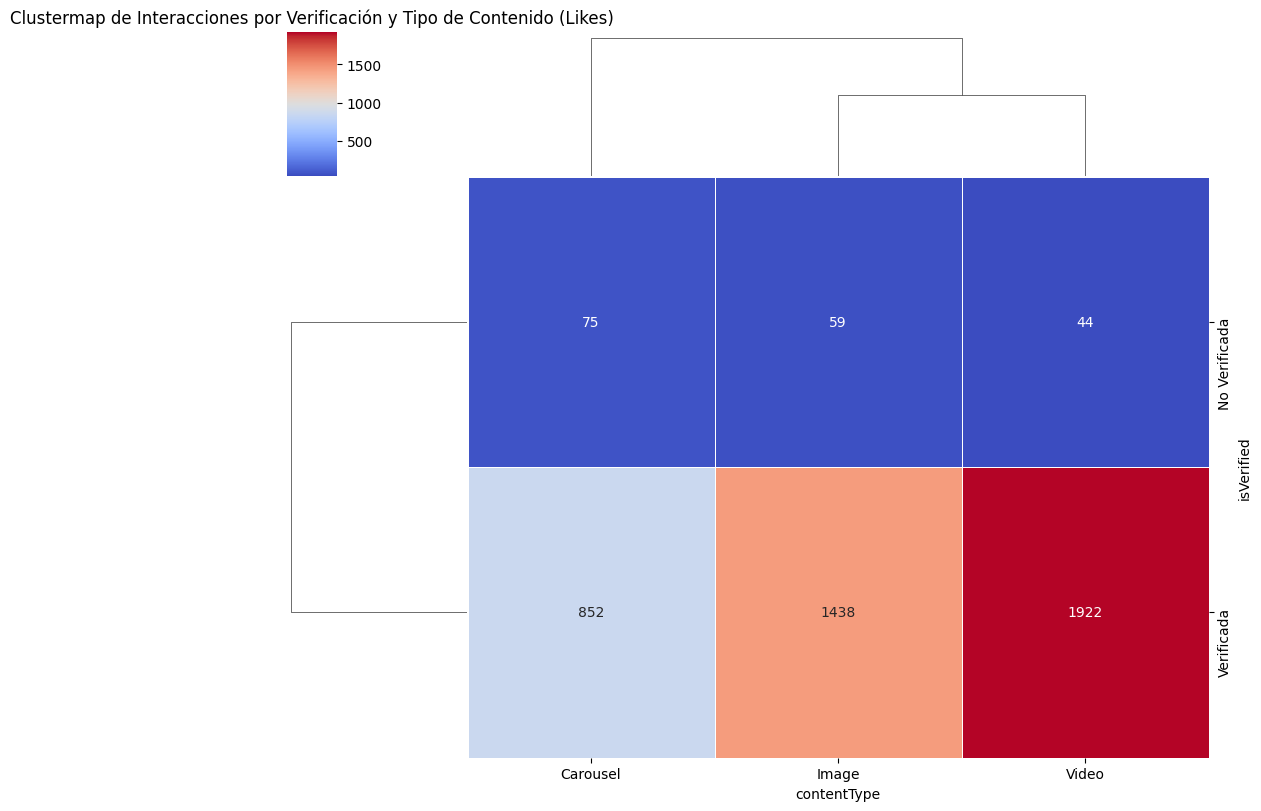

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_instagram = pd.ExcelFile('Excel Instagram.xlsx').parse(0)

if 'contentType' not in data_instagram.columns:
    data_instagram['contentType'] = data_instagram.apply(
        lambda row: 'Video' if row.get('isVideo', False) else ('Carousel' if row.get('isCarousel', False) else 'Image'),
        axis=1
    )

enhanced_verification_data = data_instagram[['likeCount', 'commentCount', 'owner/isVerified', 'contentType']].dropna()
enhanced_verification_data['isVerified'] = enhanced_verification_data['owner/isVerified'].replace({True: 'Verificada', False: 'No Verificada'})


verification_content_summary = enhanced_verification_data.groupby(['isVerified', 'contentType'])[['likeCount', 'commentCount']].mean().reset_index()

verification_content_pivot = verification_content_summary.pivot_table(index="isVerified", columns="contentType", values="likeCount")

sns.clustermap(
    verification_content_pivot,
    cmap='coolwarm',
    annot=True,
    fmt='.0f',
    figsize=(10, 8),
    linewidths=0.5
)
plt.title('Clustermap de Interacciones por Verificación y Tipo de Contenido (Likes)')
plt.show()


<ipython-input-4-d1d613d2f3ff>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_tiktok.groupby('duration_range')['authorMeta/digg']


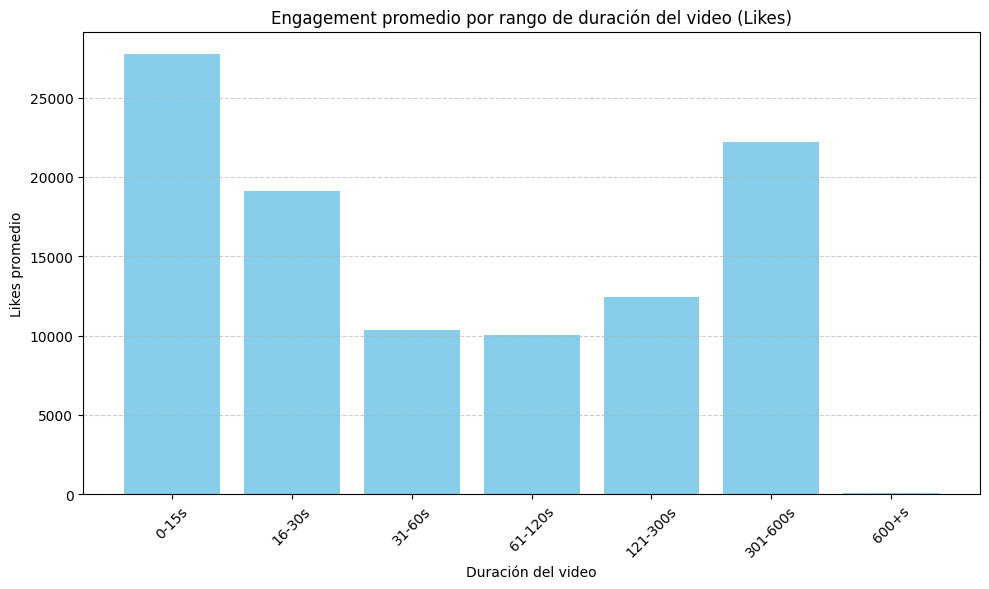

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

data_tiktok = pd.ExcelFile('Excel Tiktok 1k.xlsx').parse(0)

bins = [0, 15, 30, 60, 120, 300, 600, float('inf')]
labels = ['0-15s', '16-30s', '31-60s', '61-120s', '121-300s', '301-600s', '600+s']
data_tiktok['duration_range'] = pd.cut(data_tiktok['videoMeta/duration'], bins=bins, labels=labels, right=True)

engagement_by_duration = (
    data_tiktok.groupby('duration_range')['authorMeta/digg']
    .mean()
    .reset_index()
    .rename(columns={'authorMeta/digg': 'average_likes'})
)

plt.figure(figsize=(10, 6))
plt.bar(engagement_by_duration['duration_range'], engagement_by_duration['average_likes'], color='skyblue')
plt.title('Engagement promedio por rango de duración del video (Likes)')
plt.xlabel('Duración del video')
plt.ylabel('Likes promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

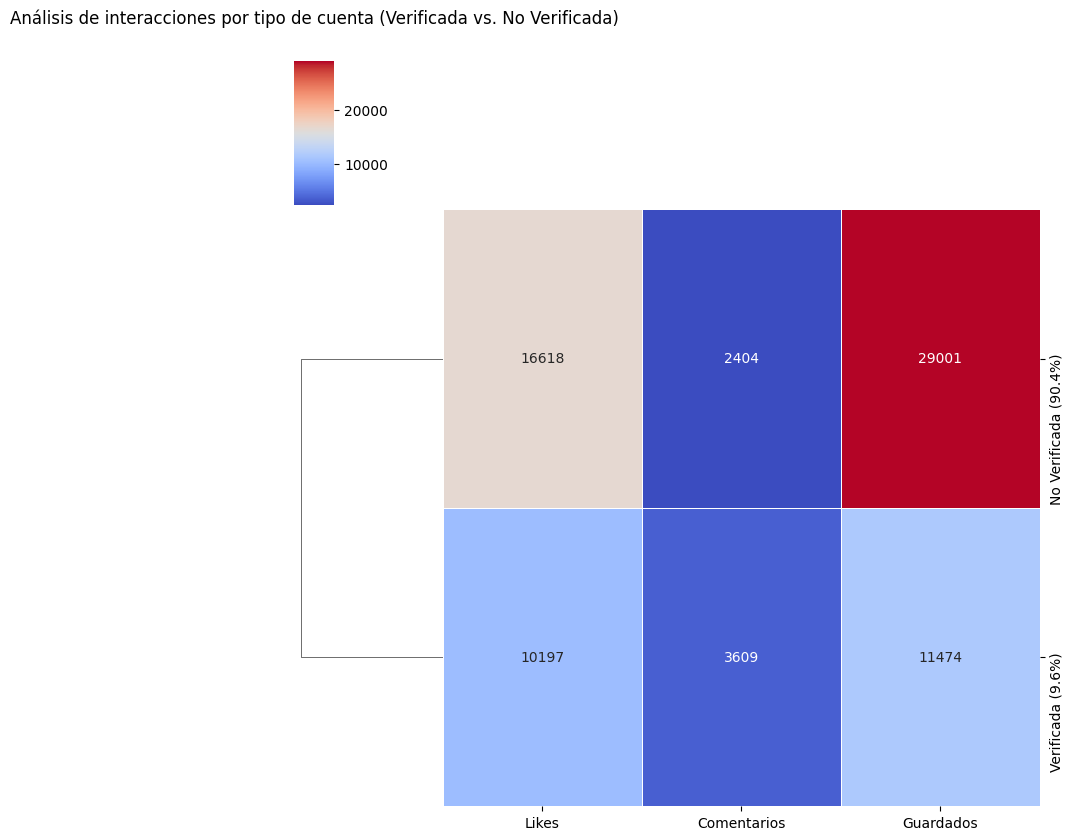

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Excel Tiktok 1k.xlsx'
tiktok_data = pd.read_excel(file_path)

clustermap_data = tiktok_data[['authorMeta/verified', 'authorMeta/digg', 'commentCount', 'collectCount']].dropna()


clustermap_grouped = clustermap_data.groupby('authorMeta/verified').mean()


clustermap_grouped_renamed = clustermap_grouped.rename(columns={
    'authorMeta/digg': 'Likes',
    'commentCount': 'Comentarios',
    'collectCount': 'Guardados'
})


verified_count = tiktok_data['authorMeta/verified'].value_counts()
total_accounts = verified_count.sum()
percentages = (verified_count / total_accounts) * 100


clustermap_grouped_renamed.index = [
    f'No Verificada ({percentages[False]:.1f}%)',
    f'Verificada ({percentages[True]:.1f}%)'
]


plt.figure(figsize=(10, 8))
cluster = sns.clustermap(
    clustermap_grouped_renamed,
    cmap='coolwarm',
    annot=True,
    fmt='.0f',
    linewidths=0.5,
    col_cluster=False,
    figsize=(8, 8)
)


plt.title('Análisis de interacciones por tipo de cuenta (Verificada vs. No Verificada)', y=1.2)
cluster.ax_heatmap.set_title('')


plt.show()


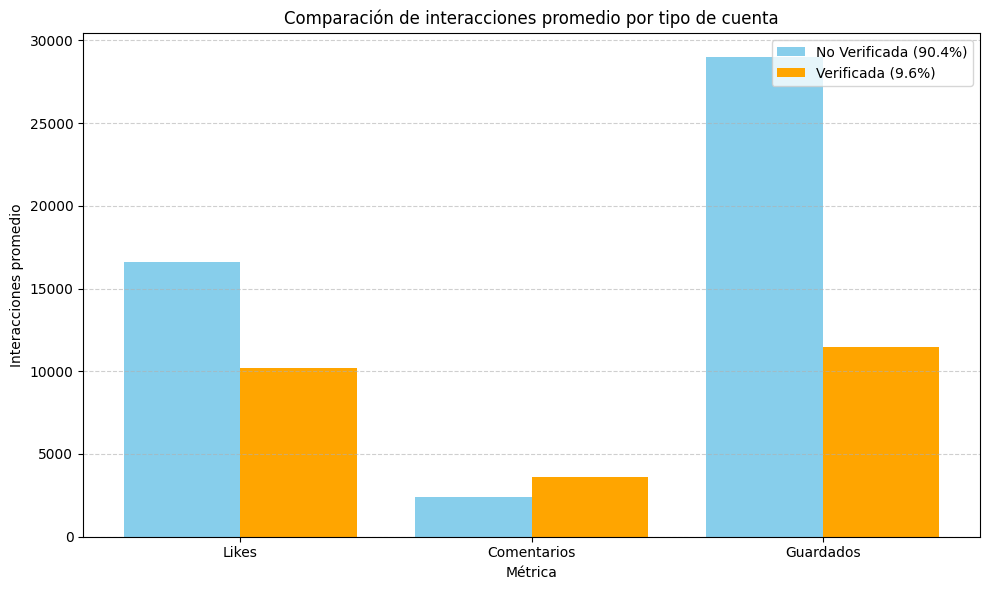

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'Excel Tiktok 1k.xlsx'
tiktok_data = pd.read_excel(file_path)


clustermap_data = tiktok_data[['authorMeta/verified', 'authorMeta/digg', 'commentCount', 'collectCount']].dropna()
clustermap_grouped = clustermap_data.groupby('authorMeta/verified').mean()


clustermap_grouped_renamed = clustermap_grouped.rename(columns={
    'authorMeta/digg': 'Likes',
    'commentCount': 'Comentarios',
    'collectCount': 'Guardados'
})

verified_count = tiktok_data['authorMeta/verified'].value_counts()
total_accounts = verified_count.sum()
percentages = (verified_count / total_accounts) * 100


clustermap_grouped_renamed.index = [
    f'No Verificada ({percentages[False]:.1f}%)',
    f'Verificada ({percentages[True]:.1f}%)'
]


metrics = ['Likes', 'Comentarios', 'Guardados']
values_verified = clustermap_grouped_renamed.loc['Verificada (9.6%)'].values
values_not_verified = clustermap_grouped_renamed.loc['No Verificada (90.4%)'].values
x = np.arange(len(metrics))


plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, values_not_verified, width=0.4, label='No Verificada (90.4%)', color='skyblue')
plt.bar(x + 0.2, values_verified, width=0.4, label='Verificada (9.6%)', color='orange')


plt.title('Comparación de interacciones promedio por tipo de cuenta')
plt.xlabel('Métrica')
plt.ylabel('Interacciones promedio')
plt.xticks(x, metrics)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


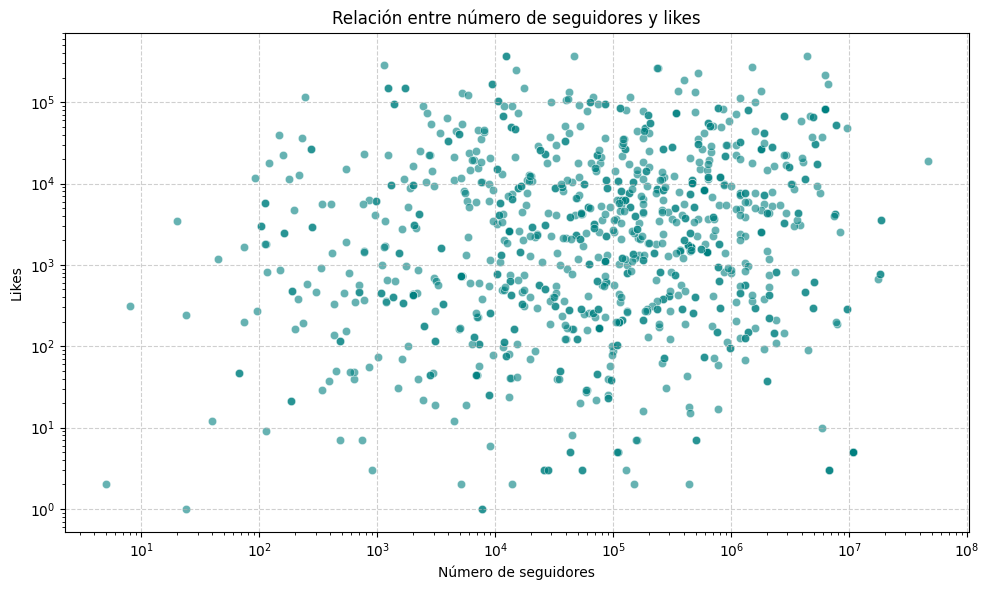

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'Excel Tiktok 1k.xlsx'
tiktok_data = pd.read_excel(file_path)

followers_likes_data = tiktok_data[['authorMeta/fans', 'authorMeta/digg']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='authorMeta/fans',
    y='authorMeta/digg',
    data=followers_likes_data,
    alpha=0.6,
    color='teal',
    marker='o'
)


plt.title('Relación entre número de seguidores y likes')
plt.xlabel('Número de seguidores')
plt.ylabel('Likes')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


**FIN**

In [2]:
print("FIN")

FIN
